# <center><font size="6">Construção dos modelos e resultados do projeto<center>

link do projeto: https://github.com/Egmara/Machine-Learning-Projeto-UFPR-Reconhecimento-de-algarismos

# <font size="6">Classificadores</font>

<font color="green"><font size="5">1. Rede Neural (solver lbfgs)</font>

<font size="3">Treinamento com Banco de Dados de tamanho variado.</font>

<font color="black"><font size="3">-> Banco de Dados total:</font>

<center><font color="black"><font size="3"> 15 folhas * 15 linhas * 10 algarismos = 2250 algarismos</font><center>

<font size="3">-> Selecão da quantidade de algarismos para geração de alguns modelos.</font>

<center><font color="black"><font size="3">Modelo 1: 150 algarismos
    <br>Modelo 2: 300 algarismos
    <br>...
    <br>Modelo 15: 2250 algarismos</font><center>

<font size="3">O modelo escolhido é o de maior score!</font>

In [1]:
# scores
import numpy as np
scores = np.load('Banco de dados/Saidas/scores_redeneural.npy')
for i, score in zip(range(1,16,1),scores):
    print('Modelo '+str(i)+': ',score)

Modelo 1:  0.766666666667
Modelo 2:  0.8
Modelo 3:  0.844444444444
Modelo 4:  0.883333333333
Modelo 5:  0.84
Modelo 6:  0.9
Modelo 7:  0.919047619048
Modelo 8:  0.845833333333
Modelo 9:  0.911111111111
Modelo 10:  0.92
Modelo 11:  0.927272727273
Modelo 12:  0.894444444444
Modelo 13:  0.920512820513
Modelo 14:  0.909523809524
Modelo 15:  0.884444444444


<font size="4">Maior score: Modelo 11.</font>

<font color="green"><font size="5">2. Floresta Aleatória (20 Árvores com 10 camadas de profundidade) </font>

<font color="black"><font size="3">-> Mesmo banco de dados: 1650 algarismos
    <br>-> Score: 0.90303030303</font>


# <font size="6">Resultados</font>

In [2]:
import cv2
import matplotlib.pyplot as plt

# carrega os classificadores salvos
import joblib
clf_redeneural = joblib.load('Modelos_de_Classificacao/clf_redeneural.pkl')
clf_floresta = joblib.load('Modelos_de_Classificacao/clf_floresta.pkl')
modelos = {'rede_neural': clf_redeneural, 'floresta': clf_floresta}

# carrega funcao de classificacao do teste
from classifica_teste import classifica_teste

/home/egmara/.local/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.21.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/egmara/.local/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.21.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/egmara/.local/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.21.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/egmara/.local/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.21.2 when using version 0.20.3. This might lead to brea

# Teste 1

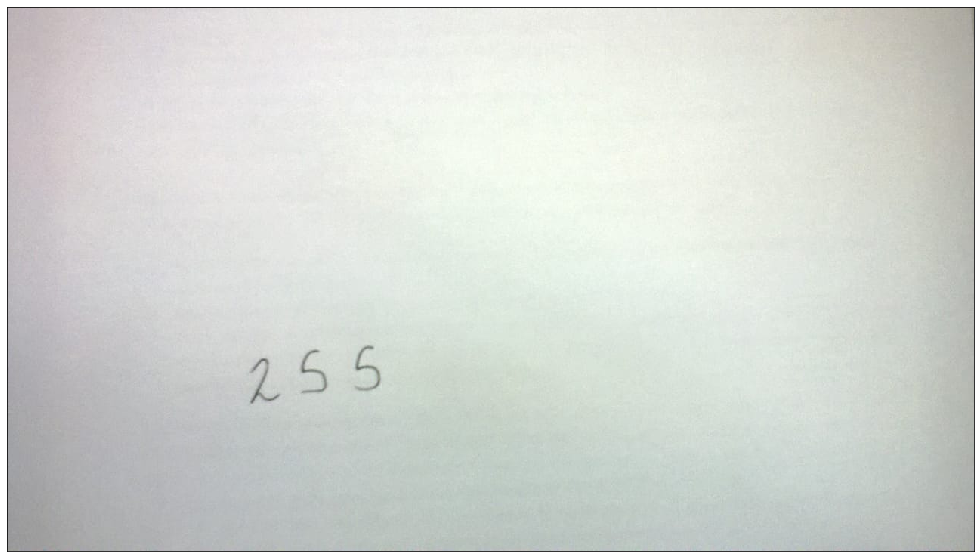

In [3]:
img = cv2.imread('testes/teste1.jpeg')
plt.figure(figsize=(20,10))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [3]:
# chama funcao
resultados = classifica_teste('testes/teste1.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}')

Rede Neural: [2 5 5], 
Floresta: [1 5 5]


<font size="4">Gabarito:<font color="red"> [2, 5, 5]</font>

<font size="4">Acertos: 
<br>-> Floresta: 2/3
<br>-> Rede Neural: 3/3

# Teste 2

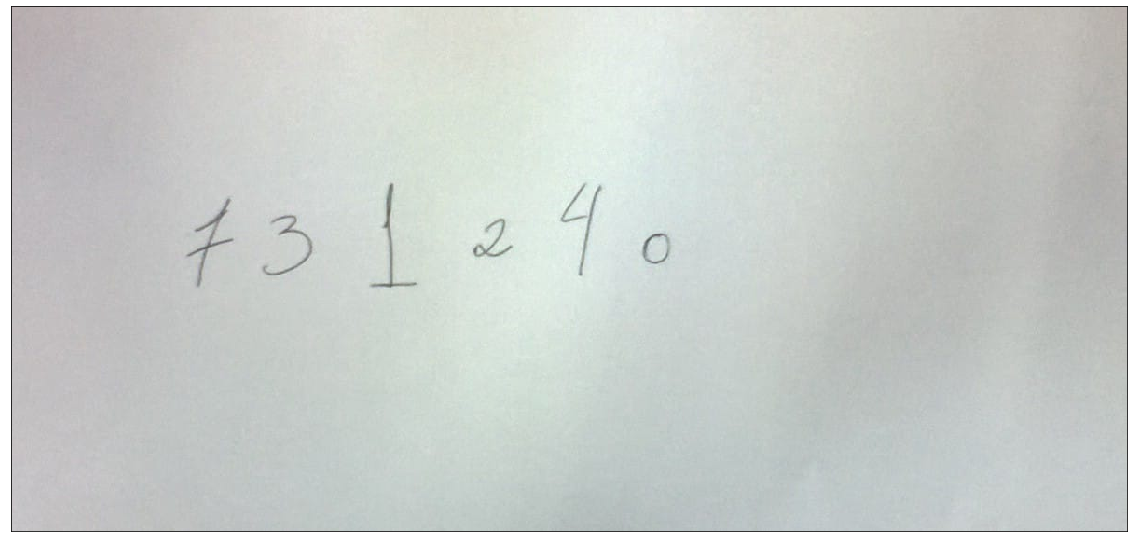

In [3]:
img = cv2.imread('testes/teste2.jpeg')
plt.figure(figsize=(20,10))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [4]:
# chama funcao
resultados = classifica_teste('testes/teste2.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}')

Rede Neural: [1 2 3 1 4 1], 
Floresta: [0 2 3 1 4 1]


<font size="4">Gabarito:<font color="red"> [0, 2, 3, 7, 4, 1]</font>

<font size="4">Acertos: 
<br>-> Floresta: 4/6
<br>-> Rede Neural: 4/6

# Teste 3

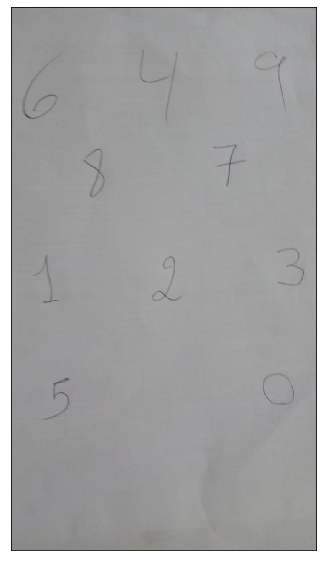

In [4]:
img = cv2.imread('testes/teste3.jpeg')
plt.figure(figsize=(20,10))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [21]:
# chama funcao
resultados = classifica_teste('testes/teste3.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}')

Rede Neural: [5 0 2 1 3 8 7 6 9 4], 
Floresta: [5 0 1 1 3 9 1 1 9 7]


<font size="4">Gabarito:<font color="red"> [5, 0, 2, 1, 3, 8, 7, 6, 9, 4]</font>

<font size="4">Acertos: 
<br>-> Floresta: 5/10
<br>-> Rede Neural: 10/10

# Teste 4

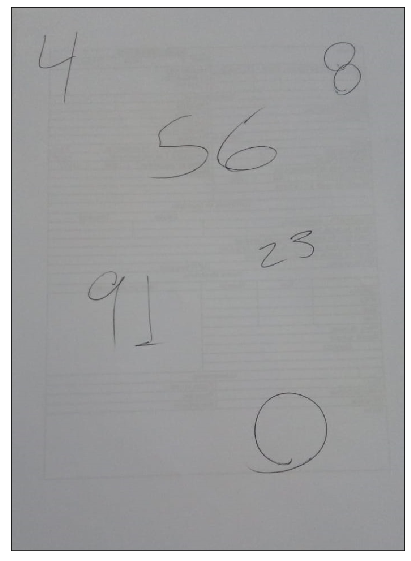

In [5]:
img = cv2.imread('testes/teste4.jpeg')
plt.figure(figsize=(20,10))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [22]:
# chama funcao
resultados = classifica_teste('testes/teste4.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}')

Rede Neural: [0 1 4 2 9 0 1 9 4], 
Floresta: [4 1 4 9 9 5 4 8 4]


<font size="4">Gabarito:<font color="red"> [0, 1, 9, 2, 3, 5, 6, 8, 4]</font>

<font size="4">Acertos: 
<br>-> Floresta: 1/9
<br>-> Rede Neural: 4/9

# Teste 5

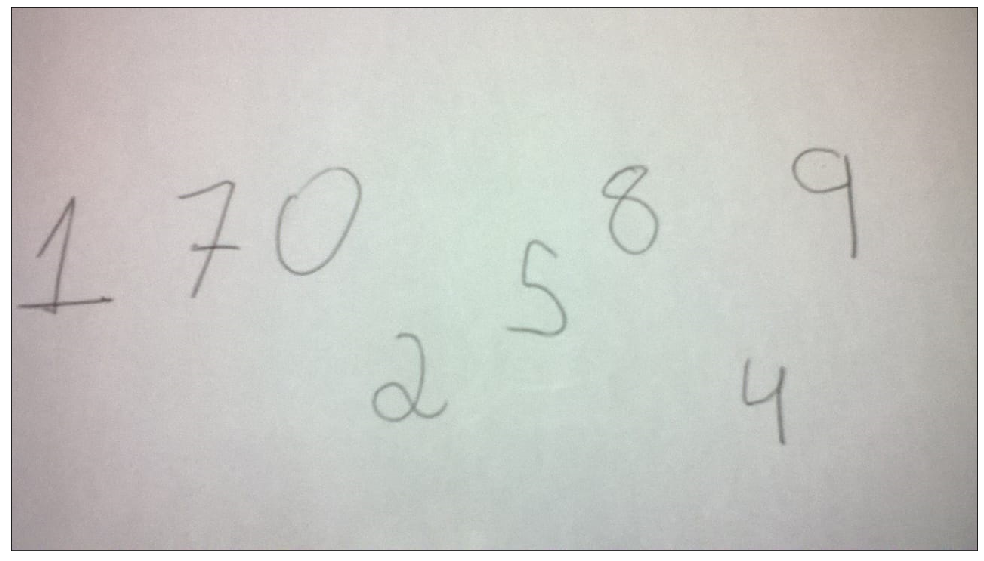

In [6]:
img = cv2.imread('testes/teste5.jpeg')
plt.figure(figsize=(20,10))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [23]:
# chama funcao
resultados = classifica_teste('testes/teste5.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}')

Rede Neural: [4 2 5 1 7 0 0 9], 
Floresta: [4 2 5 1 7 0 5 9]


<font size="4">Gabarito:<font color="red"> [4, 2, 5, 1, 7, 0, 8, 9]</font>

<font size="4">Acertos: 
<br>-> Floresta: 5/8
<br>-> Rede Neural: 7/8

# Teste 6

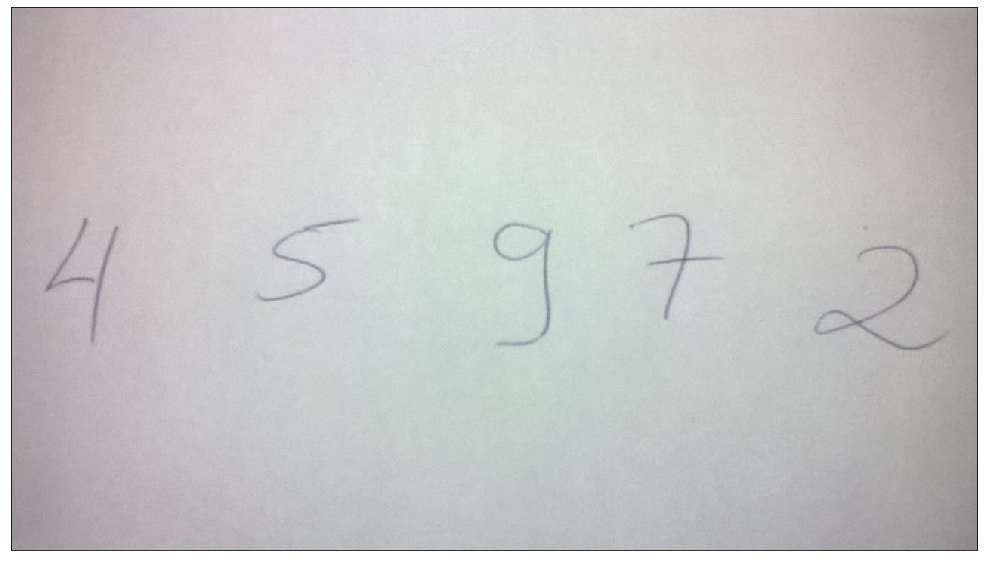

In [7]:
img = cv2.imread('testes/teste6.jpeg')
plt.figure(figsize=(20,10))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [24]:
# chama funcao
resultados = classifica_teste('testes/teste6.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}')

Rede Neural: [2 9 5 4 7], 
Floresta: [7 5 4 4 7]


<font size="4">Gabarito:<font color="red"> [2, 9, 5, 4, 7]</font>

<font size="4">Acertos: 
<br>-> Floresta: 3/5
<br>-> Rede Neural: 5/5

<font size="6">Resultado final:

<font size="4">-> Floresta: <font color="red">20/41<font color=black>. Score: <font color="red">0.4878048780487805<font color=black>
<br>-> Rede Neural: <font color="red">33/41<font color=black>. Score: <font color="red">0.8048780487804879</font>

# Novo Teste

In [5]:
# teste com o prof.
filename = 'testes/teste7.jpeg'
n = 10

In [6]:
# chama funcao
resultados = classifica_teste(filename, modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}')

Rede Neural: [4 5 8 7 9 3 4 1 5 1], 
Floresta: [4 1 8 1 3 3 4 1 5 1]


In [16]:
# Gabarito: 4, 1, 8, 7, 9, 3, 4, 1, 5, 1 - a ordem correta é pega da função separa algarismos